In [1]:
from _utils import *

# Load dataset from file
folder_path = '/mnt/home/tudomlumleart/ceph/10_ToniaDataset/ToniaDataset_withPolys.mat'

dataset = scipy.io.loadmat(folder_path)

# Hox locus dataset
nHox = 72
ctcfNtPolysHox = dataset['ctcfNtPolysHox']
ctcfPolysHox = dataset['ctcfPolysHox']
ntPolysHox = dataset['ntPolysHox']
radNtPolysHox = dataset['radNtPolysHox']
radPolysHox = dataset['radPolysHox']

# Sox locus dataset
nSox = 93
ctcfNtPolysSox = dataset['ctcfNtPolysSox']
ctcfPolysSox = dataset['ctcfPolysSox']
ntPolysSox = dataset['ntPolysSox']
radNtPolysSox = dataset['radNtPolysSox']
radPolysSox = dataset['radPolysSox']

# Interpolate polymers to fill in the NaN values 
ctcfNtPolysHox = interpolate_polymers(ctcfNtPolysHox)
ctcfPolysHox = interpolate_polymers(ctcfPolysHox)
ntPolysHox = interpolate_polymers(ntPolysHox)
radNtPolysHox = interpolate_polymers(radNtPolysHox)
radPolysHox = interpolate_polymers(radPolysHox)

ctcfNtPolysSox = interpolate_polymers(ctcfNtPolysSox)
ctcfPolysSox = interpolate_polymers(ctcfPolysSox)
ntPolysSox = interpolate_polymers(ntPolysSox)
radNtPolysSox = interpolate_polymers(radNtPolysSox)
radPolysSox = interpolate_polymers(radPolysSox)


def calculate_distance_map(polys):
    # Extract the dimensions of the input array
    num_probes, num_coords, num_cells = polys.shape
    
    # Initialize an array of the same shape to hold the interpolated values
    new_maps = np.zeros((num_cells, num_probes, num_probes))
    
    # Iterate over each cell
    for c in range(num_cells):
        # Extract the data for the current cell
        curr_cells = polys[:, :, c]
        
        # Skip cells with all missing values
        if np.all(np.isnan(curr_cells)):
            continue  # This leaves a matrix of zeros in the output array
        
        # Calculate the pairwise Euclidean distance between each pair of probes
        dmap = squareform(pdist(curr_cells))
        
        # Assign the distance map to the corresponding position in the output array
        new_maps[c, :, :] = dmap
    
    # Return the array with interpolated values
    return new_maps

# Generate distance maps from interpolated polymers
ctcfNtMapsHox = calculate_distance_map(ctcfNtPolysHox)
ctcfMapsHox = calculate_distance_map(ctcfPolysHox)
ntMapsHox = calculate_distance_map(ntPolysHox)
radNtMapsHox = calculate_distance_map(radNtPolysHox)
radMapsHox = calculate_distance_map(radPolysHox)

ctcfNtMapsSox = calculate_distance_map(ctcfNtPolysSox)
ctcfMapsSox = calculate_distance_map(ctcfPolysSox)
ntMapsSox = calculate_distance_map(ntPolysSox)
radNtMapsSox = calculate_distance_map(radNtPolysSox)
radMapsSox = calculate_distance_map(radPolysSox)

# Plot the median maps of these distance maps 
# To check if the distance maps are reasonable
ctcfNtMapsHox_median = np.nanmedian(ctcfNtMapsHox, axis=0)
ctcfMapsHox_median = np.nanmedian(ctcfMapsHox, axis=0)
ntMapsHox_median = np.nanmedian(ntMapsHox, axis=0)
radNtMapsHox_median = np.nanmedian(radNtMapsHox, axis=0)
radMapsHox_median = np.nanmedian(radMapsHox, axis=0)

ctcfNtMapsSox_median = np.nanmedian(ctcfNtMapsSox, axis=0)
ctcfMapsSox_median = np.nanmedian(ctcfMapsSox, axis=0)
ntMapsSox_median = np.nanmedian(ntMapsSox, axis=0)
radNtMapsSox_median = np.nanmedian(radNtMapsSox, axis=0)
radMapsSox_median = np.nanmedian(radMapsSox, axis=0)

# Generate flatten maps from distance maps
ctcfNtFlattenHox = np.array([x.flatten() for x in ctcfNtMapsHox])
ctcfFlattenHox = np.array([x.flatten() for x in ctcfMapsHox])
ntFlattenHox = np.array([x.flatten() for x in ntMapsHox])
radNtFlattenHox = np.array([x.flatten() for x in radNtMapsHox])
radFlattenHox = np.array([x.flatten() for x in radMapsHox])

ctcfNtFlattenSox = np.array([x.flatten() for x in ctcfNtMapsSox])
ctcfFlattenSox = np.array([x.flatten() for x in ctcfMapsSox])
ntFlattenSox = np.array([x.flatten() for x in ntMapsSox])
radNtFlattenSox = np.array([x.flatten() for x in radNtMapsSox])
radFlattenSox = np.array([x.flatten() for x in radMapsSox])

allFlattenHox = np.concatenate((ctcfFlattenHox, ntFlattenHox, radFlattenHox), axis=0)
allFlattenSox = np.concatenate((ctcfFlattenSox, ntFlattenSox, radFlattenSox), axis=0)

2024-10-03 14:03:19.457358: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-03 14:03:19.987964: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [2]:
allFlattenContactHox = allFlattenHox < 250  # 1 if contact < 250 nm, 0 otherwise

In [8]:
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances

In [22]:
diss = euclidean_distances(allFlattenHox)

In [23]:
kmin = 100
kmax = 200

In [ ]:
dm = kmedoids.dynmsc(diss, kmax, kmin)
print("Optimal number of clusters according to the Medoid Silhouette:", dm.bestk)
print("Medoid Silhouette over range of k:", dm.losses)
print("Range of k:", dm.rangek)

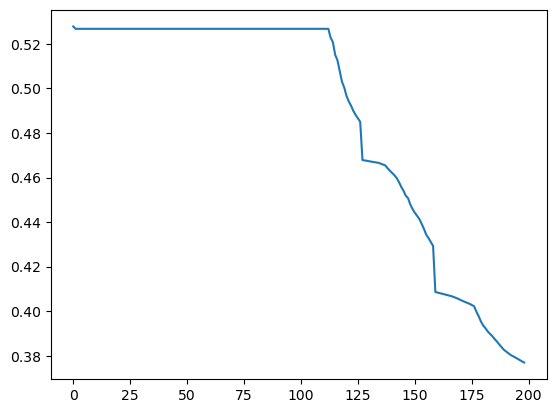

In [13]:
plt.plot(dm.losses)

In [16]:
medoids_idx = dm.medoids

In [21]:
allFlattenContactHox[medoids_idx[1]]

array([ True,  True,  True, ...,  True,  True,  True])

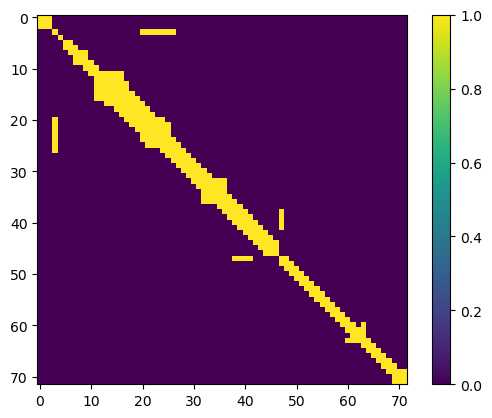

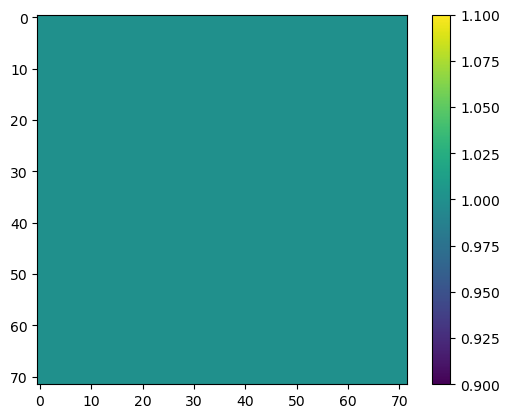

In [19]:
# Plot the median maps of these distance maps
for x in allFlattenContactHox[medoids_idx, :]:
    plt.imshow(x.reshape(72, 72))
    plt.colorbar()
    plt.show()